<IMG align=left src="https://faculty.sbs.arizona.edu/hammond/ling508-f17/logo.png" height=30>

<div align=right>
Linguistics 408/508<br>
Hammond<br>
Fall 2017
</div>

<h1 align=center>Homework #3</h1>

## General

<ol>

<li>This is due at the <i>beginning</i> of class on <b>Oct. 3</b>.

<li>Rename this file based on your last name, e.g. <code>hw3.ipynb</code> &rarr; <code>jones3.ipynb</code>

<li>Answer all questions in code or text/markdown boxes and
in separate files as specified by the question.

<li>Code does not need to be perfect, but make sure it runs without error.

<li>Make sure to <i>save</i> the file....

</ol>

## 408 and 508

<ol>

<li>Write a program that goes through the <code>alice.txt</code>
text and prints out all multiple <em>wh-</em> questions. We
define these as questions that begin with a <em>wh-</em> word
and contain at least one more <em>wh-</em> word in the
question.<p>

You may <em>not</em> use regular expressions.<p>

You should put the program in a file of its own
named <code>lastname2ex1.py</code>
<em>and</em> paste it in the box below.

</ol>

As you told in the class, I found every sentence-sized thing that includes a Wh-word and then sorted them by their first Wh-word in the second question.  

In [ ]:
# There may be some lines of code in between which I turned into comments. I used them to check the output step by step,
#I did not take them all out since you might need to check some of them

#read the Alice textfile
inFile = open ('alice.txt', 'r')
aliceText = inFile.read()
inFile.close()

#a function to remove non-space breaks (tabs and new lines)
def makespaces(t):
    breaks = '\n\t'
    r1 = ''
    i = 0
    while i < len(t):
        if t[i] in breaks:
            r1 = r1 + ' '
        else:
            r1 = r1 + t[i]
        i += 1
    r2 = r1[0]
    i = 1
    while i < len(r1):
        if r1[i] == ' ' and \
            r2[len(r2)-1] == ' ':
                i += 1
                continue
        else:
            r2 = r2 + r1[i]
        i += 1
    return r2

# a function to split the text into sentences based on the splitters (.?!)
def getsentences(t):
    splitters = '.?!'
    ss = []
    i = 0
    while i < len(t):
        s = ''
        while i < len(t) and \
            t[i] not in splitters:
                s = s + t[i]
                i += 1
        if i < len(t):
            s = s + t[i]
        i += 1
        ss.append(s)
    return ss

#a function to remove the extra spaces at the edges of sentences
def trimspaces(t):
    r1 = []
    for s in t:
        if s[0] == ' ':
            s = s[1:]
        slast = len(s) - 1
        if len(s) > 0 and s[slast] == ' ':
            s = s[:slast]
        r1.append(s)
    r2 = []
    for s in r1:
        if len(s) > 0:
            r2.append(s)
    return r2

#remove tabs, new lines and extra spaces
cleanedAliceText = makespaces(aliceText)
#split Alice text into sentences
aliceSentences = getsentences(cleanedAliceText)
#print all the splitted sentences
#for i in range(len(aliceSentences)):
    #print(i,aliceSentences[i])
    
#remove extra spaces at the edges of sentences
trimAliceSentences = trimspaces(aliceSentences)

        
whWords= ["what", "why", "where", "when", "which", "who", 'whom', "how"]
#use i counter to keep track of the number of the sentences in which there is at least one wh-word
i=0
#for each sentence in the list of all sentences
for sentence in trimAliceSentences:
    #split that sentence into words
    wordList = sentence.lower().split()
    #go through each word in that sentence
    for word in wordList:
        #if it is in whwords, print the sentence and exit the lowest for loop
        if word in whWords:
            #I use i+1 since I don't wanna the number of the first sentence to be 0 
            #I would like to print the sentences with numbers starting from 1 but I turned it into a comment
            #so in the second question, the numbers do not preceding them, 
            #and they will not be confused with the numbers of sorted sentences (I don't wanna have 2 different numbers in a row in question 2)
            #print (i+1, sentence, '\n') 
            print (sentence, "\n")
            i+=1
            break
          
        
                

<ol start=2>

<li>Write a second program that takes the output of
the program above as <em>standard input</em>, sorts the sentences
by what the sentence-initial <em>wh-</em> word is, and
prints the sorted list of sentences to a file.<p>

You may <em>not</em> use regular expressions.<p>

You should put the program in a file of its own
named <code>lastname2ex2.py</code>
<em>and</em> paste it in the box below.

</ol>

In [ ]:
import sys
whWords= ["what", "why", "where", "when", "which", "who", 'whom', "how"] 
sortedwhWords=sorted(whWords)
#print (sortedwhWords)
aliceWhSentences = sys.stdin.readlines()
writtenFile = open('roya.txt', 'w') 
i= 0
#for each wh-word in the sorted list of wh-words
for whword in sortedwhWords:
    #for each sentence in the list of sentences which have at least one wh-word
     for sentence in aliceWhSentences:
        #split that sentence into words and go through each word
        for word in sentence.split():
             if word in sortedwhWords:
                #if that wh-word equals to the wh-word picked up in the first for loop
                if word == whword:
                    #write the whole sentence into the output file and exit the lowest for loop
                    #and move on to the next sentence
                    #since the method write takes only one string argument, all the other arguments shoub be converted into string and concatenate by +
                    #to get only one string argument
                    writtenFile.write('\n' + str (i+1) + '(' + str (whword) + ')' + ": " + sentence + '\n')
                    i+=1
                    break
writtenFile.close()



<ol start=3>

<li>Write a program that takes a command-line argument
and checks if it is a palindrome.<p>

You may <em>not</em>
use regular expressions.<p>

You should put the program in a file of its own
named <code>lastname2ex3.py</code>
<em>and</em> paste it in the box below.

</ol>

In [4]:
import sys
#i starts from 1 since the index 0 in the command line will be the name of the code file 
i = 1
while i < len (sys.argv):
    #join the lowercase characters of the argument in a reversed order 
    reversedWord = ''.join(reversed(sys.argv[i].lower()))
        #check if it equals the (lowercase) argument taken in the command line
    if sys.argv[i].lower() == reversedWord:
        print ("YAAAAY, it's a palindrome.")
    else:
        print ("sorry, it is not a palindrome.")
    i += 1

sorry, it is not a palindrome.
sorry, it is not a palindrome.


## 508 only

<ol start=4>

<li>Write a program that goes through the <em>Alice</em>
text and calculates the average number of words in each
sentence.<p>

Your program should output the number of sentences, the
average number of words, and some graphical
representation of the distribution of lengths.<p>

You can do this with the python plotting library if
you like, but you can also do it with some sort of
text-based graphic as well.<p>

You should put the program in a file of its own
named <code>lastname2ex4.py</code>
<em>and</em> paste it in the box below.

</ol>

The total number of words is:  28200
The total number of sentences is:  1727
The average number of words in each sentence is:  16.328894035900404 

The distribution of sentences in terms of average number of words:
1 : 39
2 : 63
3 : 84
4 : 123
5 : 95
6 : 92
7 : 100
8 : 84
9 : 80
10 : 59
11 : 57
12 : 47
13 : 58
14 : 43
15 : 32
16 : 46
17 : 39
18 : 32
19 : 33
20 : 30
21 : 31
22 : 33
23 : 32
24 : 25
25 : 22
26 : 19
27 : 18
28 : 16
29 : 18
30 : 10
31 : 12
32 : 16
33 : 17
34 : 15
35 : 9
36 : 15
37 : 6
38 : 13
39 : 16
40 : 10
41 : 8
42 : 10
43 : 12
44 : 7
45 : 9
46 : 3
47 : 7
48 : 5
49 : 2
50 : 1
51 : 8
52 : 1
53 : 1
54 : 3
55 : 3
56 : 10
57 : 3
58 : 2
59 : 3
60 : 3
61 : 1
62 : 4
63 : 1
64 : 1
65 : 2
66 : 2
67 : 2
69 : 4
71 : 2
72 : 1
73 : 1
74 : 1
75 : 1
77 : 1
79 : 1
82 : 1
87 : 1
94 : 1
99 : 1
103 : 1
108 : 2
114 : 1
124 : 1
164 : 1
165 : 1
179 : 1


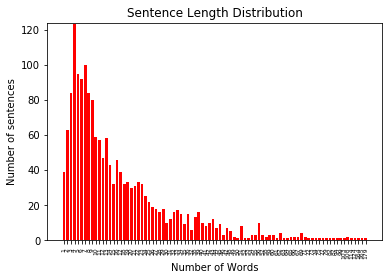

In [7]:
#read the Alice textfile
inFile = open ('alice.txt', 'r')
aliceText = inFile.read()
inFile.close()

#a function to remove non-space breaks (tabs and new lines)
def makespaces(t):
    breaks = '\n\t'
    r1 = ''
    i = 0
    while i < len(t):
        if t[i] in breaks:
            r1 = r1 + ' '
        else:
            r1 = r1 + t[i]
        i += 1
    r2 = r1[0]
    i = 1
    while i < len(r1):
        if r1[i] == ' ' and \
            r2[len(r2)-1] == ' ':
                i += 1
                continue
        else:
            r2 = r2 + r1[i]
        i += 1
    return r2

# a function to split the text into sentences based on the splitters (.?!)
def getsentences(t):
    splitters = '.?!'
    ss = []
    i = 0
    while i < len(t):
        s = ''
        while i < len(t) and \
            t[i] not in splitters:
                s = s + t[i]
                i += 1
        if i < len(t):
            s = s + t[i]
        i += 1
        ss.append(s)
    return ss

#a function to remove the extra spaces at the edges of sentences
def trimspaces(t):
    r1 = []
    for s in t:
        if s[0] == ' ':
            s = s[1:]
        slast = len(s) - 1
        if len(s) > 0 and s[slast] == ' ':
            s = s[:slast]
        r1.append(s)
    r2 = []
    for s in r1:
        if len(s) > 0:
            r2.append(s)
    return r2

#remove tabs, new lines and extra spaces
cleanedAliceText = makespaces(aliceText)

#splitting the Alice text into words to get the total number of words 
words = cleanedAliceText.split()
print ("The total number of words is: ", len(words))

#split Alice text into sentences
aliceSentences = getsentences(cleanedAliceText)
    
#remove extra spaces at the edges of sentences
trimAliceSentences = trimspaces(aliceSentences)

#printing total number of sentences
print ("The total number of sentences is: ", len(trimAliceSentences))

#average number of words 
averageOfWords = len(words)/len(trimAliceSentences)
print ("The average number of words in each sentence is: ", averageOfWords, "\n")

#creating an empty list to count the number of words in each sentence and store it, it may be useless but I could understand it better, 
#if I print the number of words in each sentence before getting the distribution of their length
wordcounts = []
#creating an empty dictionary to store the the number of occurrences of sentences of different lengths
distributionDict={}
#go through all sentences
for sentence in trimAliceSentences:
    wordsOfSentence = sentence.split()
    sentenceLength = len(wordsOfSentence)
    wordcounts.append(sentenceLength)
    if  sentenceLength in distributionDict:
        distributionDict[sentenceLength ] += 1
    else:
        distributionDict[sentenceLength ] = 1

#print the number of words in each sentence in the text
#print ("The number of words in each sentence:")
#for i in range (len(wordcounts)):
#        print (i+1, ": ", wordcounts[i])
        
#print the distribution of sentences based on average number of words
print ("The distribution of sentences in terms of average number of words:")
for c in sorted(distributionDict):
    print(c, ":", distributionDict[c])

#convert the Dictionary to list, then sort it and again convert it to a new dictionary
distributionList = list (distributionDict.items())
#print (distributionList)
sortedDistributionList = sorted (distributionList, key=lambda tup: tup[0])
#print (sortedDistributionList)
finalDict = dict(sortedDistributionList)
#print (finalDict)

#importing the plotting libraries to get the graphical representation of the distribution of lengths
import pylab as pl
import numpy as np

pl.bar (range(len(finalDict)), finalDict.values(), align='center', width=0.75, color ='red')
pl.xticks (range(len(finalDict)), finalDict.keys(), fontsize=6, rotation=90)
ymax= max(finalDict.values())+1
xmax = max (distributionDict.keys())+1
pl.xlabel ('Number of Words')
pl.ylabel ('Number of sentences')
pl.title ('Sentence Length Distribution')
pl.ylim(0, ymax)
pl.show() 
